In [36]:
# --- Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
# --- Load and convert dataset ---
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Display first few rows
print("First few rows of the dataset:")
display(df.head())
# --- Step 1: Handle missing values ---
print("Checking for missing values:")
print(df.isnull().sum()) # Expect all 0s
# --- Step 2: One-hot encoding (skipped) ---
# The dataset contains only numerical features. If it had categorical columns,
# we would use pd.get_dummies() or OneHotEncoder.
# --- Step 3: Feature Scaling ---
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
# Convert back to DataFrame for readability
scaled_df = pd.DataFrame(scaled_data, columns=iris.feature_names)
print("Standardized data ready for clustering:")
display(scaled_df.head())
# --- Optional: Save original target labels for evaluation ---
true_labels = iris.target

First few rows of the dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Checking for missing values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64
Standardized data ready for clustering:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


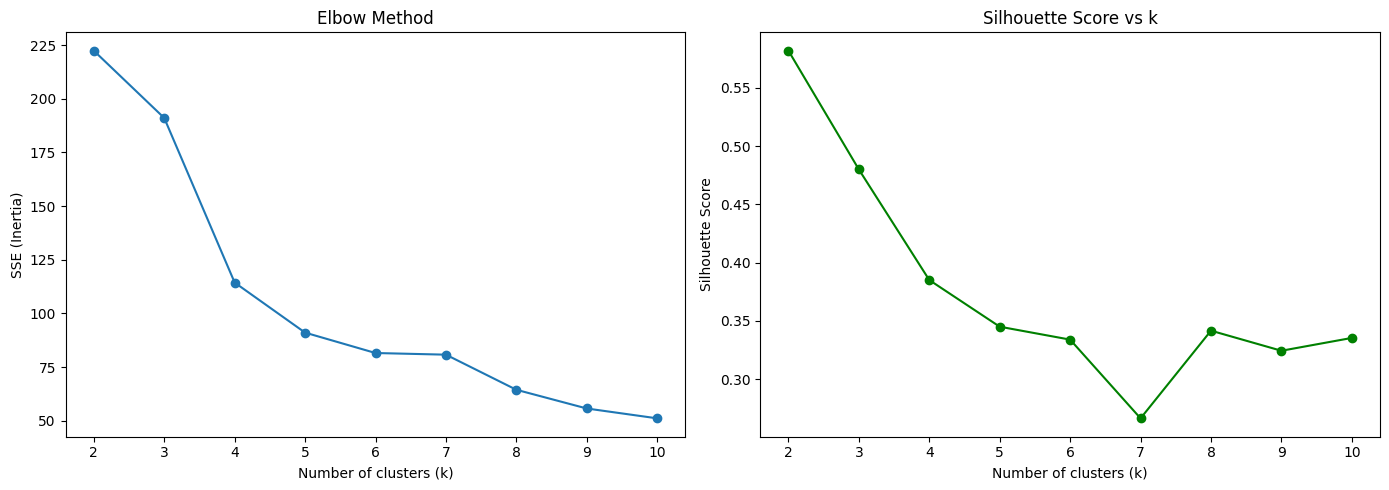

Optimal number of clusters (K-Means): 2


In [38]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# --- Determine optimal k using Elbow Method ---
sse = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)  # Sum of squared distances
    silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))

# --- Plot Elbow Curve and Silhouette Scores ---
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Elbow Method Plot
ax[0].plot(k_range, sse, marker='o')
ax[0].set_title("Elbow Method")
ax[0].set_xlabel("Number of clusters (k)")
ax[0].set_ylabel("SSE (Inertia)")

# Silhouette Score Plot
ax[1].plot(k_range, silhouette_scores, marker='o', color='green')
ax[1].set_title("Silhouette Score vs k")
ax[1].set_xlabel("Number of clusters (k)")
ax[1].set_ylabel("Silhouette Score")

plt.tight_layout()
plt.show()

# Best k based on silhouette score
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters (K-Means): {optimal_k}")


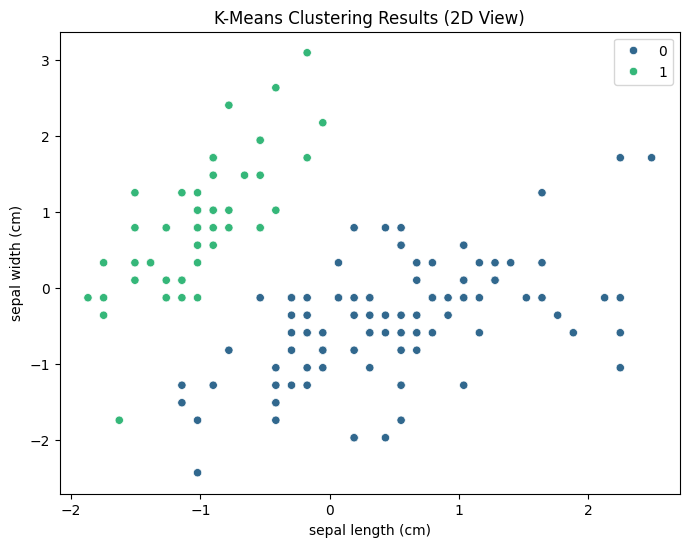

In [40]:
# Fit KMeans with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_df)
# Visualize clusters (using first two features)
plt.figure(figsize=(8, 6))
sns.scatterplot(
x=scaled_df.iloc[:, 0],
y=scaled_df.iloc[:, 1],
hue=kmeans_labels,
palette="viridis",
legend="full"
)
plt.title("K-Means Clustering Results (2D View)")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

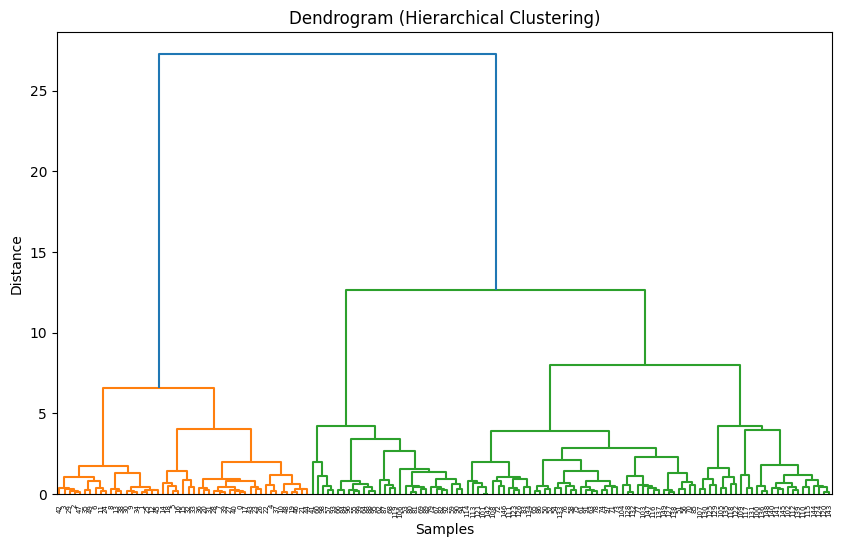

In [41]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
# --- Dendrogram to determine optimal number of clusters ---
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(scaled_df, method='ward'))
plt.title("Dendrogram (Hierarchical Clustering)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

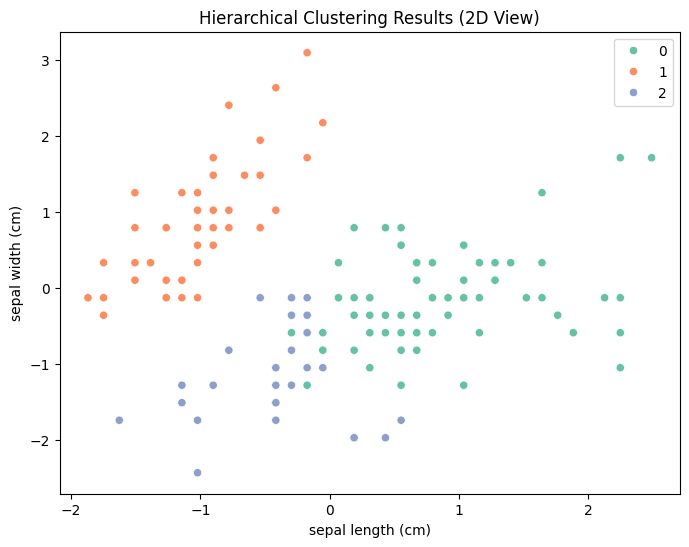

In [42]:
# Fit Agglomerative Clustering
hierarchical = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
hierarchical_labels = hierarchical.fit_predict(scaled_df)
# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
x=scaled_df.iloc[:, 0],
y=scaled_df.iloc[:, 1],
hue=hierarchical_labels,
palette="Set2"
)
plt.title("Hierarchical Clustering Results (2D View)")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

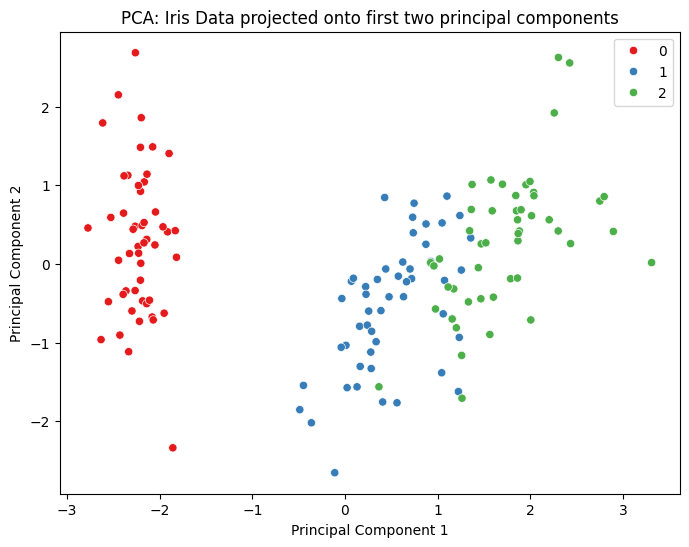

In [43]:
from sklearn.decomposition import PCA
# Initialize PCA to reduce to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df)
# Convert to DataFrame for plotting
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
# Plot PCA result
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue=true_labels, palette='Set1', legend='full')
plt.title('PCA: Iris Data projected onto first two principal components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

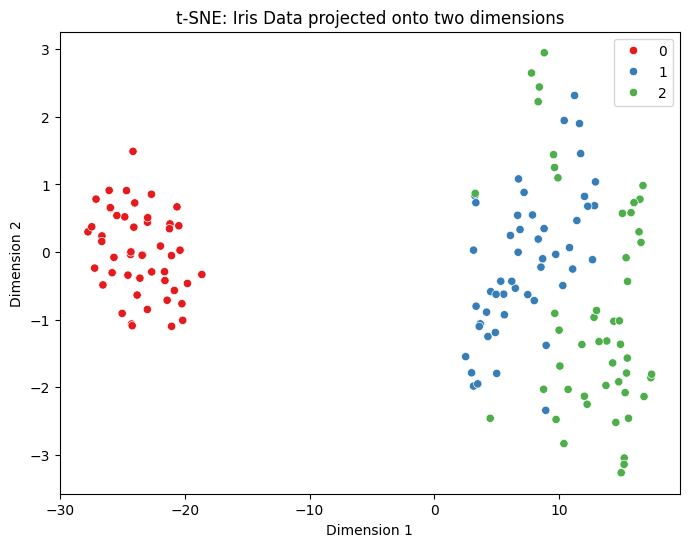

In [44]:
from sklearn.manifold import TSNE
# Initialize t-SNE to reduce to 2 dimensions
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_result = tsne.fit_transform(scaled_df)
# Convert to DataFrame for plotting
tsne_df = pd.DataFrame(data=tsne_result, columns=['Dim1', 'Dim2'])
# Plot t-SNE result
plt.figure(figsize=(8,6))
sns.scatterplot(x='Dim1', y='Dim2', data=tsne_df, hue=true_labels, palette='Set1', legend='full')
plt.title('t-SNE: Iris Data projected onto two dimensions')
plt.xlabel('Dimension 1')

plt.ylabel('Dimension 2')
plt.show()

In [46]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score for K-Means clusters
silhouette_kmeans = silhouette_score(scaled_df, kmeans_labels)
print(f"Silhouette Score for K-Means Clustering: {silhouette_kmeans:.4f}")

# Calculate silhouette score for Hierarchical clusters
silhouette_hierarchical = silhouette_score(scaled_df, hierarchical_labels)
print(f"Silhouette Score for Hierarchical Clustering: {silhouette_hierarchical:.4f}")


Silhouette Score for K-Means Clustering: 0.5818
Silhouette Score for Hierarchical Clustering: 0.4467
